---
Data Mining Project Introduction

#Cardiovascular disease Recognition

Gabriele Carrà, student ID: 240475

Dataset used: heart_2020_cleaned.csv    

---

#Reading the dataset
Loading from Google Drive and displaying the last rows.


##Uploading from Google Drive
Preview of the last rows, to determine the total number.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
# Graphic settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Linking with google drive
from google.colab import drive
drive.mount('/content/drive')

# Path
file_path = '/content/drive/MyDrive/'

#Importing the dataset from drive
drive.mount('/content/drive')

# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_new.csv')
print("Dataset uploaded.")
display(df.tail())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset uploaded.


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
487365,No,31.32,Yes,No,No,2.0,2.0,No,Female,65-69,Black,No,Yes,Fair,6.0,No,No,No
487366,Yes,26.13,Yes,No,No,2.0,0.0,No,Female,80 or older,White,Yes,Yes,Fair,8.0,No,No,No
487367,No,26.37,No,No,No,21.0,0.0,No,Female,40-44,Hispanic,No,Yes,Fair,NaN,No,No,No
487368,No,18.56,No,No,No,0.0,0.0,No,Female,40-44,Black,No,Yes,Good,8.0,No,No,No
487369,No,26.54,Yes,Yes,No,0.0,0.0,No,Male,50-54,White,No,Yes,NaN,7.0,No,No,No


In [ ]:
print("Dataset's Information:")
df.info()

print("\nDescriptive statistics:")
print(df.describe())

print("\nNull values for column:")
print(df.isnull().sum())
print("\n",df.columns)

Dataset's Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487370 entries, 0 to 487369
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      487370 non-null  object 
 1   BMI               487370 non-null  float64
 2   Smoking           487370 non-null  object 
 3   AlcoholDrinking   487370 non-null  object 
 4   Stroke            487370 non-null  object 
 5   PhysicalHealth    487370 non-null  float64
 6   MentalHealth      487370 non-null  float64
 7   DiffWalking       487370 non-null  object 
 8   Sex               487370 non-null  object 
 9   AgeCategory       487370 non-null  object 
 10  Race              487370 non-null  object 
 11  Diabetic          487370 non-null  object 
 12  PhysicalActivity  487370 non-null  object 
 13  GenHealth         463002 non-null  object 
 14  SleepTime         463002 non-null  float64
 15  Asthma            487370 non-null  object 
 1

#Data exploration
Initial data analysis to understand distributions, anomalies, and relationships between variables.
Includes all charts, tables, and visual analyses performed on the dataset.

##Distribution of the target variable


Visualize the distribution of age (in years) among patients with and without heart conditions, to highlight any significant differences.

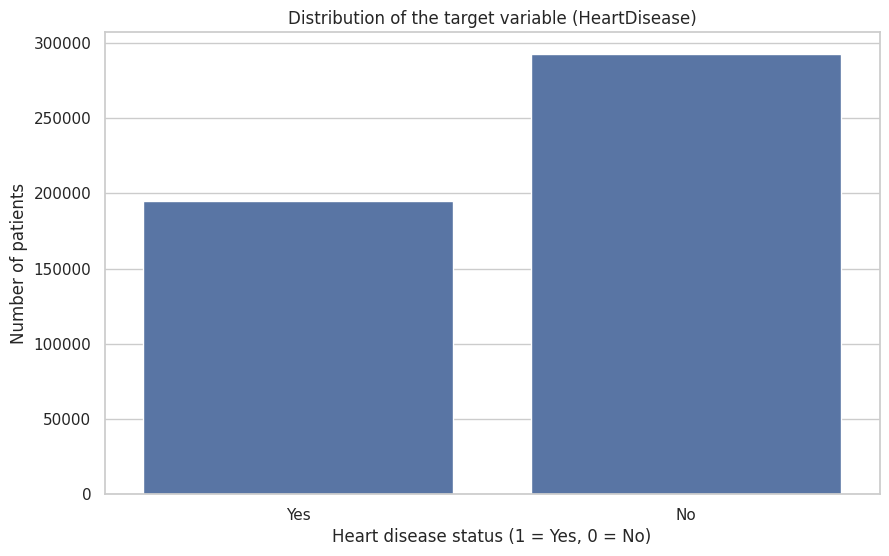


Distribution of the target variable:
HeartDisease
No     60.0
Yes    40.0
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of the target variable (HeartDisease)")
plt.xlabel("Heart disease status (1 = Yes, 0 = No)")
plt.ylabel("Number of patients")
plt.show()

print("\nDistribution of the target variable:")
print(df['HeartDisease'].value_counts(normalize=True)* 100)



## Barplot with Lineplot

Age balancing based on the `HealthDisease` variable.

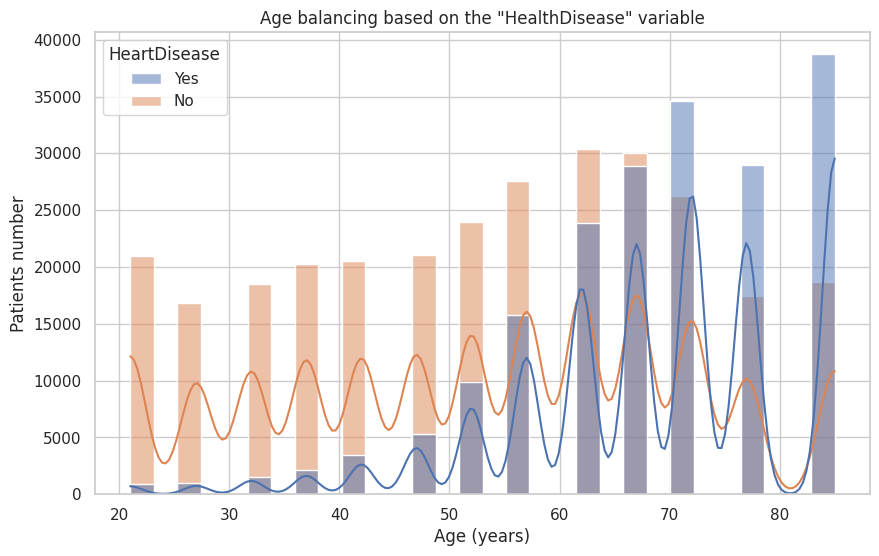

In [ ]:
# Map to estimate the average age from each category.
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 85
}

# Applying the mapping to the AgeCategory column.
df['age_years'] = df['AgeCategory'].map(age_mapping)
sns.histplot(data=df, x='age_years', hue='HeartDisease', bins=30, kde=True)
plt.title("Age balancing based on the \"HealthDisease\" variable")
plt.xlabel("Age (years)")
plt.ylabel("Patients number")
plt.show()

##Box plot
Provides a visual representation of Q1 (25th percentile), Q2 (50th percentile), and Q3 (75th percentile), and helps identify outliers relative to the BMI distribution.


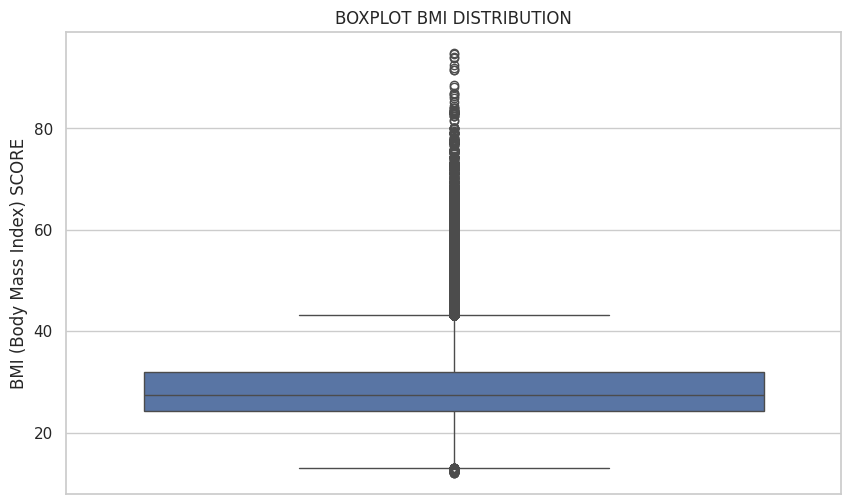

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['BMI'])

plt.title('BOXPLOT BMI DISTRIBUTION')
plt.ylabel('BMI (Body Mass Index) SCORE')
plt.show()


##Pie chart
Serves to display the percentage distribution of BMI values.


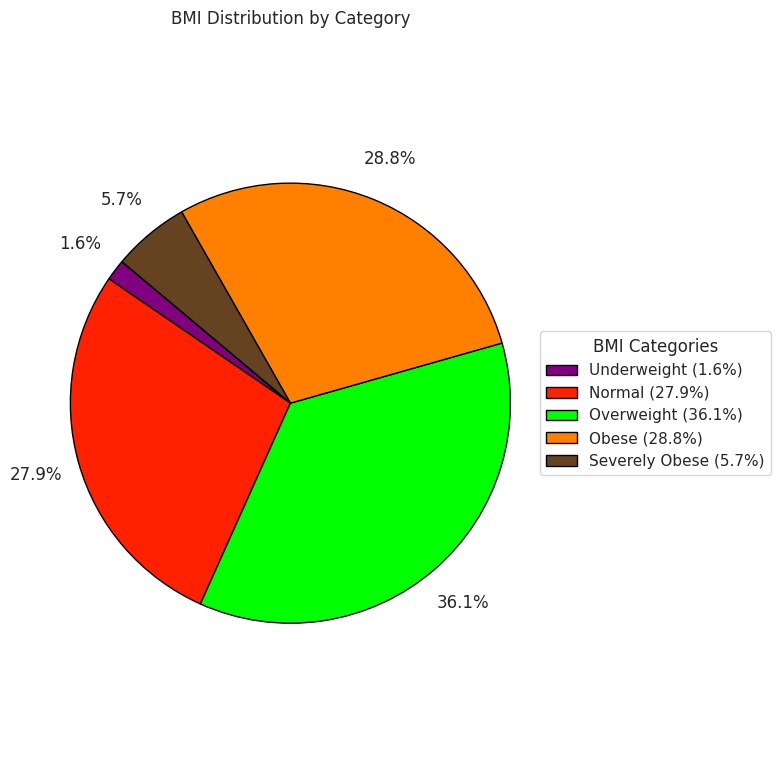

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 40:
        return "Obese"
    else:
        return "Severely Obese"

# Apply BMI categorization
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Group and sort BMI category counts
bmi_counts = df['BMI_Category'].value_counts().sort_values(ascending=False)

# Define categories to highlight (keep these in the legend)
main_categories = ["Underweight", "Normal", "Overweight", "Obese", "Severely Obese"]
main_counts = bmi_counts[main_categories]

# Sum the remaining categories into "Other"
other_count = bmi_counts.drop(main_categories, errors='ignore').sum()

# Combine into final series for pie chart
pie_values = pd.concat([main_counts, pd.Series({'Other': other_count})])
percentages = 100 * pie_values / pie_values.sum()

# Labels for legend (main categories only)
legend_labels = [f"{cat} ({percentages[cat]:.1f}%)" for cat in main_categories]

# Pie chart settings
colors = ['#800080', '#FF2100', '#00FF00', '#FF8000', '#654321', '#D3D3D3']  # include color for 'Other'

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, _ = plt.pie(
    pie_values.values,
    startangle=140,
    colors=colors,
    labels=['' for _ in pie_values.index],
    wedgeprops={'edgecolor': 'black'}
)

# Place percentages outside the pie
for i, wedge in enumerate(wedges):
    pct = percentages.iloc[i]
    if pct > 1:
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        plt.text(x * 1.2, y * 1.2, f"{pct:.1f}%", ha='center', va='center')

# Add legend on the right
plt.legend(
    [wedges[i] for i in range(len(main_categories))],
    legend_labels,
    title="BMI Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("BMI Distribution by Category")
plt.axis('equal')
plt.tight_layout()
plt.show()


##Violin plot
Shows how a continuous (numerical) variable is distributed with respect to a categorical variable.

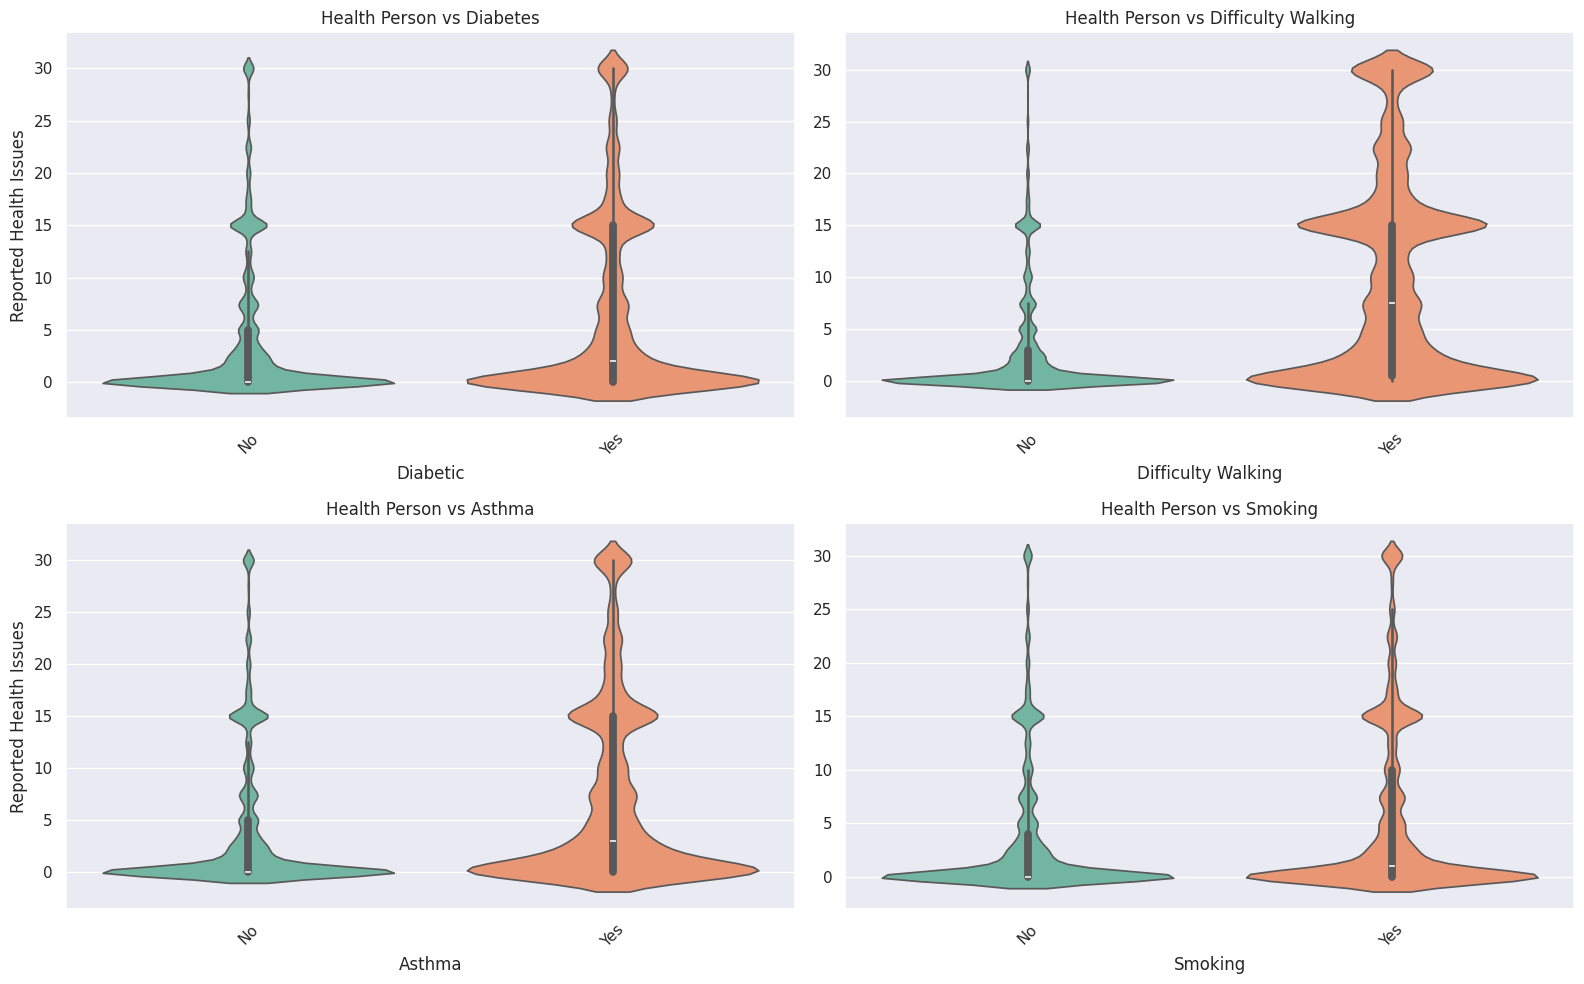

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average number of unhealthy days (physical + mental)
df['ReportedHealthIssues'] = (df['PhysicalHealth'] + df['MentalHealth']) / 2

# Simplify diabetic responses (Yes if any form of diabetes)
df['DiabeticSimplified'] = df['Diabetic'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')

# Set palette
palette_2 = sns.color_palette("Set2", 2)
sns.set_style('darkgrid')

plt.figure(figsize=(16, 10))

# 1. Health Person vs Diabetes
plt.subplot(2, 2, 1)
sns.violinplot(
    x='DiabeticSimplified',
    y='ReportedHealthIssues',
    hue='DiabeticSimplified',
    data=df,
    palette=palette_2,
    legend=False,
    order=['No', 'Yes']
)
plt.xticks(rotation=45)
plt.title('Health Person vs Diabetes')
plt.xlabel('Diabetic')
plt.ylabel('Reported Health Issues')

# 2. Health Person vs Difficulty Walking
plt.subplot(2, 2, 2)
sns.violinplot(
    x='DiffWalking',
    y='ReportedHealthIssues',
    hue='DiffWalking',
    data=df,
    palette=palette_2,
    legend=False,
    order=['No', 'Yes']
)
plt.xticks(rotation=45)
plt.title('Health Person vs Difficulty Walking')
plt.xlabel('Difficulty Walking')
plt.ylabel('')

# 3. Health Person vs Asthma
plt.subplot(2, 2, 3)
sns.violinplot(
    x='Asthma',
    y='ReportedHealthIssues',
    hue='Asthma',
    data=df,
    palette={'No': '#66c2a5', 'Yes': '#fc8d62'},
    legend=False,
    order=['No', 'Yes']
)
plt.xticks(rotation=45)
plt.title('Health Person vs Asthma')
plt.xlabel('Asthma')
plt.ylabel('Reported Health Issues')

# 4. Health Person vs Smoking
plt.subplot(2, 2, 4)
sns.violinplot(
    x='Smoking',
    y='ReportedHealthIssues',
    hue='Smoking',
    data=df,
    palette=palette_2,
    legend=False,
    order=['No', 'Yes']
)
plt.xticks(rotation=45)
plt.title('Health Person vs Smoking')
plt.xlabel('Smoking')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Pair plot
Shows potential patterns or useful correlations between variables. It is used to assess relationships, distributions, and possible separations among brand categories.


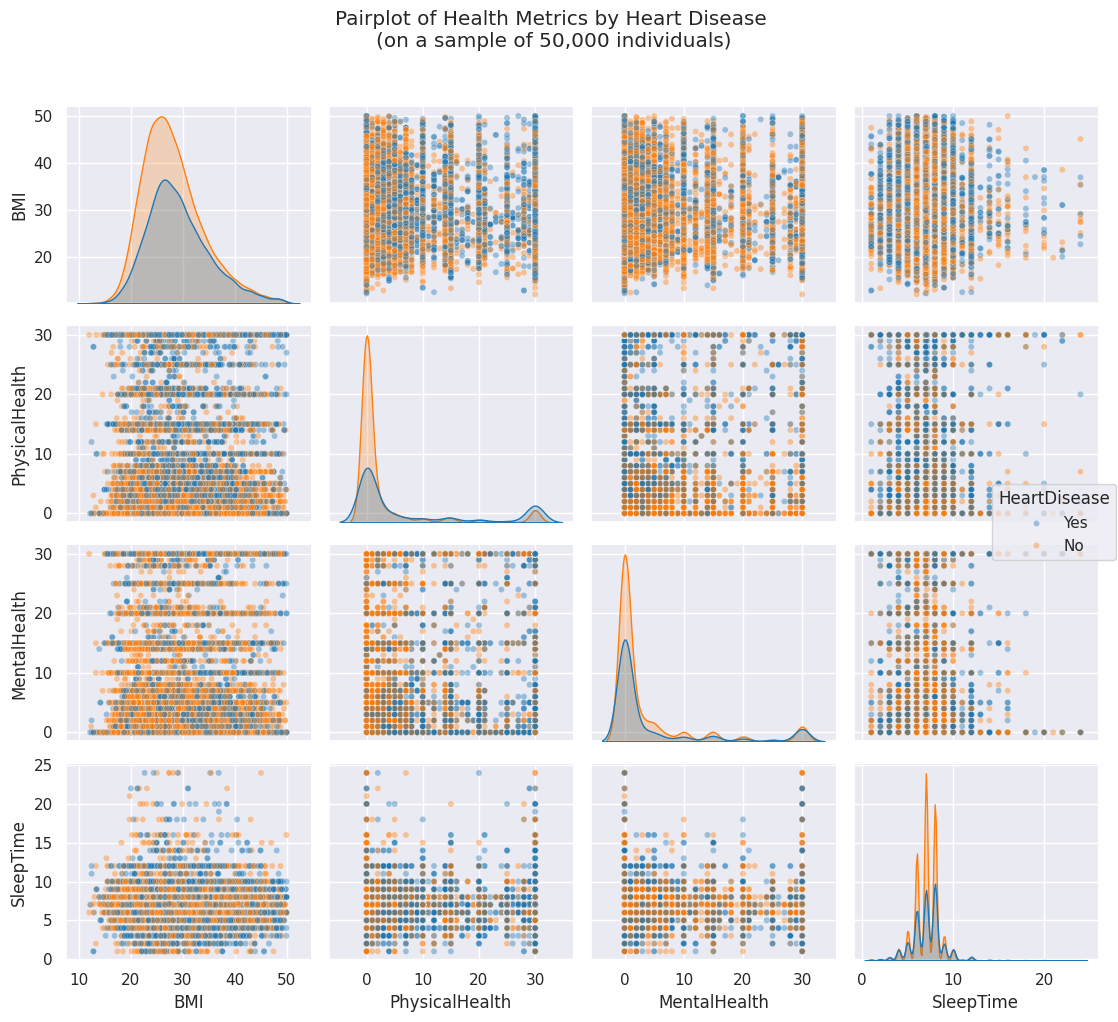

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Random sample of 50,000 individuals from the full dataset
df_sample = df.sample(n=50000, random_state=42)

# Select continuous features to include in the pairplot
selected_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Extract selected columns along with HeartDisease and make an explicit copy
df_clean = df_sample[selected_features + ['HeartDisease']].copy()
df_clean = df_clean[df_clean['BMI'] < 50]

# Convert to numeric and fill NaNs with column mean
for col in selected_features:
    df_clean.loc[:, col] = pd.to_numeric(df_clean[col], errors='coerce')  # safe assignment
    mean_value = df_clean[col].mean()
    df_clean.loc[:, col] = df_clean[col].fillna(mean_value)

# Set visualization style
sns.set(style='darkgrid')

# Create the pairplot with KDE on the diagonal
plot = sns.pairplot(
    df_clean,
    hue='HeartDisease',
    palette={'Yes': '#1f77b4', 'No': '#ff7f0e'},
    plot_kws={'alpha': 0.4, 's': 20},  # alpha = transparency, s = dot size
    diag_kind='kde',
    corner=False  # include upper triangle
)

# Title and legend styling
plot.fig.suptitle("Pairplot of Health Metrics by Heart Disease \n(on a sample of 50,000 individuals)", y=1.02)
plot._legend.set_title("HeartDisease")
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_frame_on(True)

plt.tight_layout()
plt.show()


##Grouped Barchart

Since the dataset is somewhat unbalanced, the pairplot displays correct data, but it may be misleading—at first glance, it might appear that individuals with a higher BMI have fewer heart problems. However, this visualization actually reveals that as BMI increases, the likelihood of heart-related issues also tends to rise.

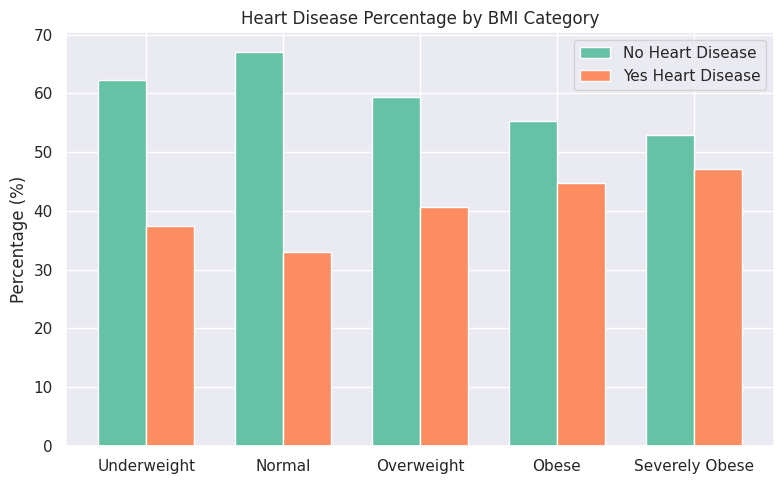

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi <40:
        return 'Obese'
    else:
        return 'Severely Obese'

df['BMICategory'] = df['BMI'].apply(bmi_category)

# Group by BMI category and HeartDisease
grouped = df.groupby(['BMICategory', 'HeartDisease']).size().unstack(fill_value=0)

# Calculate percentages
grouped['% No HeartDisease'] = grouped['No'] / grouped.sum(axis=1) * 100
grouped['% Yes HeartDisease'] = grouped['Yes'] / grouped.sum(axis=1) * 100

# Reorder categories
ordered = ['Underweight', 'Normal', 'Overweight', 'Obese','Severely Obese']
result = grouped.loc[ordered, ['% No HeartDisease', '% Yes HeartDisease']]

# Plot
categories = result.index.tolist()
no_hd = result['% No HeartDisease'].values
yes_hd = result['% Yes HeartDisease'].values
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, no_hd, width, label='No Heart Disease', color='#66c2a5')
ax.bar(x + width/2, yes_hd, width, label='Yes Heart Disease', color='#fc8d62')

ax.set_ylabel('Percentage (%)')
ax.set_title('Heart Disease Percentage by BMI Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


##Correlation Matrix

The correlation matrix shows that most variables exhibit weak or very weak linear correlations with each other. However, some noteworthy relationships emerge, particularly with the variable Heart Disease, which is the target of the predictive model.

A moderate positive correlation is observed between Age and Heart Disease (0.42), indicating that increasing age is associated with a higher likelihood of heart disease. Difficulty walking also shows a positive correlation with Heart Disease (0.29), suggesting that individuals with mobility difficulties tend to have more heart problems. Weaker but still relevant relationships are found between Stroke and Heart Disease (0.24), and Smoking and Heart Disease (0.19), both consistent with known clinical risk factors.

In contrast, Physical Activity is weakly negatively correlated with Heart Disease (-0.16), suggesting that physical activity may have a protective effect.

Other variables such as Asthma (0.069), Sleep Time (0.012), and Smoking vs Physical Activity (-0.11) show very weak or no correlations and may play a marginal or negligible role in the model's predictive power.

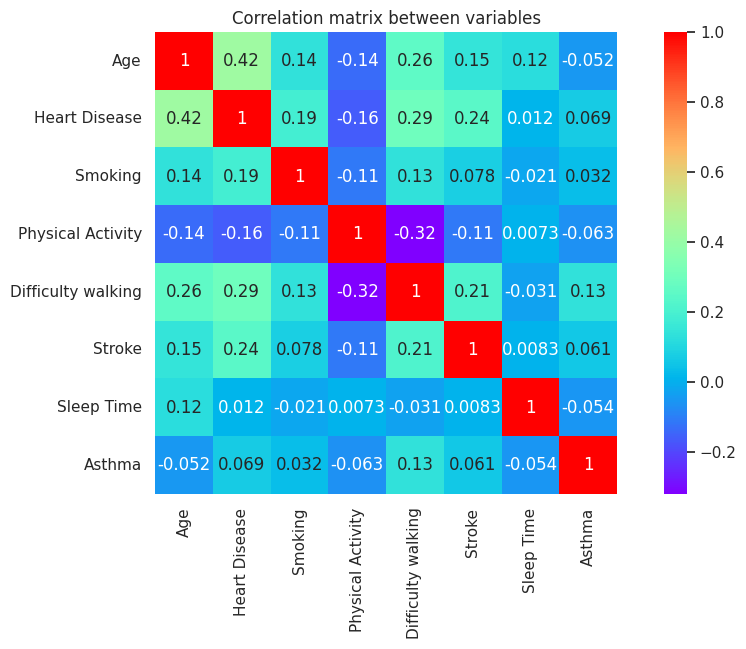

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only the selected essential columns + new additions
df_subset = df[['age_years', 'HeartDisease', 'Smoking', 'PhysicalActivity',
                'DiffWalking', 'Stroke', 'SleepTime', 'Asthma']].copy()

# Rename columns to match requested format
df_subset.rename(columns={
    'age_years': 'Age',
    'HeartDisease': 'Heart Disease',
    'PhysicalActivity': 'Physical Activity',
    'DiffWalking': 'Difficulty walking',
    'SleepTime': 'Sleep Time'
}, inplace=True)

# Encode binary categorical variables as 0 (No) and 1 (Yes)
for col in ['Heart Disease', 'Smoking', 'Physical Activity', 'Difficulty walking', 'Stroke', 'Asthma']:
    df_subset[col] = df_subset[col].map({'No': 0, 'Yes': 1})

# Drop any rows with missing values just in case
df_subset.dropna(inplace=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap="rainbow", square=True)
plt.title("Correlation matrix between variables")
plt.show()


#Data Preprocessing
Cleaning, encoding, normalization, split between training and test.

##NaN data handling

Handling missing values: deciding how to treat columns with many NaN (GenHealth and SleepTime).

In [ ]:
# Fill missing values: numeric -> mean, categorical -> mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            # Fill numeric NaN with column mean
            df[col] = df[col].fillna(df[col].mean())
        else:
            # Fill categorical NaN with column mode
            df[col] = df[col].fillna(df[col].mode()[0])

print("\nNull values for each column (after filling):")
print(df.isnull().sum())


Null values for each column (after filling):
HeartDisease            0
BMI                     0
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth          0
MentalHealth            0
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime               0
Asthma                  0
KidneyDisease           0
SkinCancer              0
age_years               0
BMI_Category            0
ReportedHealthIssues    0
DiabeticSimplified      0
BMICategory             0
dtype: int64


##Label Encoding
Convert the textual data into clearer binary values, such as (True/False) or (0/1).

In [ ]:
import pandas as pd

# Convert all categorical (text) columns to numeric using One-Hot Encoding
# drop_first=True avoids multicollinearity (drops one category per column)
df_encoded = pd.get_dummies(df, drop_first=True)

# Display basic information about the transformation
print("Original shape:", df.shape)
print("Shape after One-Hot Encoding:", df_encoded.shape)
print("\nFirst rows of the transformed dataset:")
print(df_encoded.head())

Original shape: (487370, 23)
Shape after One-Hot Encoding: (487370, 49)

First rows of the transformed dataset:
     BMI  PhysicalHealth  MentalHealth  SleepTime  age_years  \
0  29.53             5.0           0.0        8.0         72   
1  24.33             0.0          10.0        6.0         21   
2  23.11             0.0           0.0        7.0         77   
3  27.26             0.0           0.0        8.0         62   
4  23.06             0.0          10.0        8.0         27   

   ReportedHealthIssues  HeartDisease_Yes  Smoking_Yes  AlcoholDrinking_Yes  \
0                   2.5              True        False                False   
1                   5.0             False        False                 True   
2                   0.0              True         True                False   
3                   0.0              True         True                False   
4                   5.0             False        False                False   

   Stroke_Yes  ...  SkinCanc

##One hot encoding

One-Hot Encoding is applied to all columns containing textual values (HeartDisease, Smoking, AlcoholDrinking, DiffWalking, GenHealth, Sex, Race, etc.):

Each distinct category of every textual variable is converted into a binary variable (0/1).

The new columns are created with names reflecting both the original variable and the corresponding category (e.g., Smoking_Yes, HeartDisease_Yes, BMI_Category_Obese).

The original textual columns are removed and replaced with their encoded versions, while all columns that were already numeric, such as PhysicalHealth, MentalHealth, SleepTime, BMI, age_years, and ReportedHealthIssues, remain unchanged.

In [ ]:
import pandas as pd

# Apply One-Hot Encoding to all categorical columns automatically
# drop_first=True avoids dummy variable trap
df_encoded = pd.get_dummies(df, drop_first=True)

print("Original shape:", df.shape)
print("Transformed shape:", df_encoded.shape)
print("Columns after transformation:", df_encoded.columns.tolist()[:20])  # first 20 columns



Original shape: (487370, 23)
Transformed shape: (487370, 49)
Columns after transformation: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'age_years', 'ReportedHealthIssues', 'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64']


##Train-Test split

The dataset was split into two subsets:

- **70%** of the data in the training set, used to train the classification models.

- **30%** of the data in the test set, used to evaluate the performance of the models on unseen data.

The split was performed in a stratified manner with respect to the target variable `HeartDisease`, ensuring that the same proportion between the two classes (individuals with and without heart disease) is maintained in both sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['HeartDisease_Yes'])  # Use the name of your target column
y = df_encoded['HeartDisease_Yes']

# --- Split into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# --- Standardize numerical features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}, Test set shape: {X_test_scaled.shape}")


Training set shape: (341159, 48), Test set shape: (146211, 48)


##Train-Test split distribution

Shows the Train-Test distribution based on the variable `HeartDisease`.

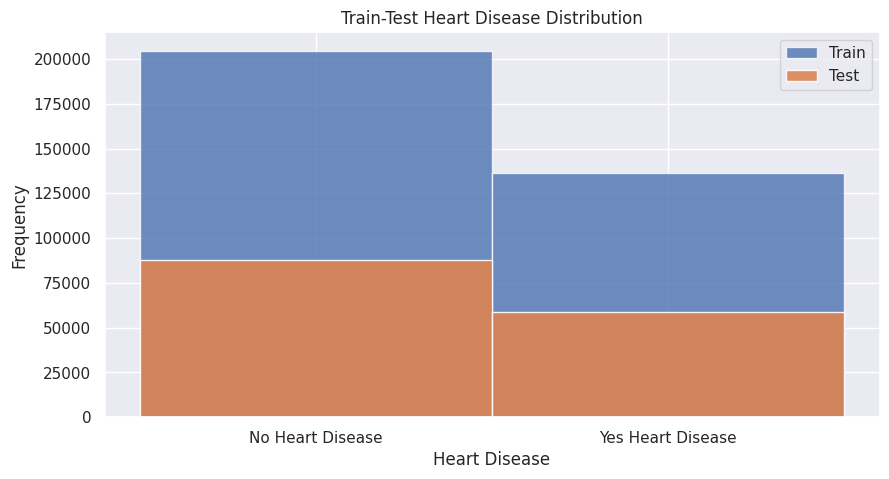

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(y_train.astype(int), bins=[-0.5, 0.5, 1.5], alpha=0.8, label='Train')
plt.hist(y_test.astype(int), bins=[-0.5, 0.5, 1.5], alpha=0.9, label='Test')
plt.xticks([0, 1], ["No Heart Disease", "Yes Heart Disease"])
plt.legend()
plt.title("Train-Test Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.show()


#Classification techniques

The techniques we are going to implement are the following:

- **K-Nearest Neighbors (KNN)**

- **Support Vector Machine (SVM)**

- **Random Forest**

- **Logistic Regression**

- **Naive Bayes (GaussianNB)**

- **Decision Tree**

- **Simple Neural Network (MLPClassifier)**

##K-Nearest Neighbors (KNN)

Classifier based on the distance between observations. The assigned class depends on the k nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.854778368248627
              precision    recall  f1-score   support

       False       0.94      0.81      0.87     87727
        True       0.76      0.93      0.84     58484

    accuracy                           0.85    146211
   macro avg       0.85      0.87      0.85    146211
weighted avg       0.87      0.85      0.86    146211



##Support Vector Machine (SVM)

Algorithm that finds the optimal hyperplane to separate the two classes by maximizing the margin.

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=10000, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7628495804009274
              precision    recall  f1-score   support

       False       0.79      0.83      0.81     87727
        True       0.72      0.66      0.69     58484

    accuracy                           0.76    146211
   macro avg       0.75      0.75      0.75    146211
weighted avg       0.76      0.76      0.76    146211



##Random Forest
Ensemble method that combines multiple decision trees to improve accuracy and robustness.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9427402862985685
              precision    recall  f1-score   support

       False       0.98      0.92      0.95     87727
        True       0.89      0.97      0.93     58484

    accuracy                           0.94    146211
   macro avg       0.94      0.95      0.94    146211
weighted avg       0.95      0.94      0.94    146211



##Logistic Regression
Linear model used for binary classification, based on the probability of class membership.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Regression Logistic Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression Logistic Accuracy: 0.7622613893619495
              precision    recall  f1-score   support

       False       0.79      0.83      0.81     87727
        True       0.72      0.67      0.69     58484

    accuracy                           0.76    146211
   macro avg       0.75      0.75      0.75    146211
weighted avg       0.76      0.76      0.76    146211



##Naive Bayes (GaussianNB)
Probabilistic classifier based on Bayes’ theorem, which assumes independence among features.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7256499169009172
              precision    recall  f1-score   support

       False       0.84      0.67      0.75     87727
        True       0.62      0.80      0.70     58484

    accuracy                           0.73    146211
   macro avg       0.73      0.74      0.72    146211
weighted avg       0.75      0.73      0.73    146211



##Decision Tree Classifier
Model based on a tree structure, also useful for extracting interpretable rules.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9197666386250009
              precision    recall  f1-score   support

       False       0.98      0.89      0.93     87727
        True       0.85      0.97      0.91     58484

    accuracy                           0.92    146211
   macro avg       0.91      0.93      0.92    146211
weighted avg       0.93      0.92      0.92    146211



## Simple Neural Network (MLPClassifier)
Neural architecture with one or more fully connected layers, implemented using scikit-learn.

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.7691350172011682
              precision    recall  f1-score   support

       False       0.81      0.80      0.81     87727
        True       0.71      0.73      0.72     58484

    accuracy                           0.77    146211
   macro avg       0.76      0.76      0.76    146211
weighted avg       0.77      0.77      0.77    146211



#Analysis and comparison of the obtained results.



##Comparing the accuracy of the models


In [ ]:
results = results = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Neural Network': accuracy_score(y_test, y_pred_nn)
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


KNN: 0.8548
SVM: 0.7628
Random Forest: 0.9427
Logistic Regression: 0.7623
Naive Bayes: 0.7256
Decision Tree: 0.9198
Neural Network: 0.7691


##Accuracy comparison among the models used

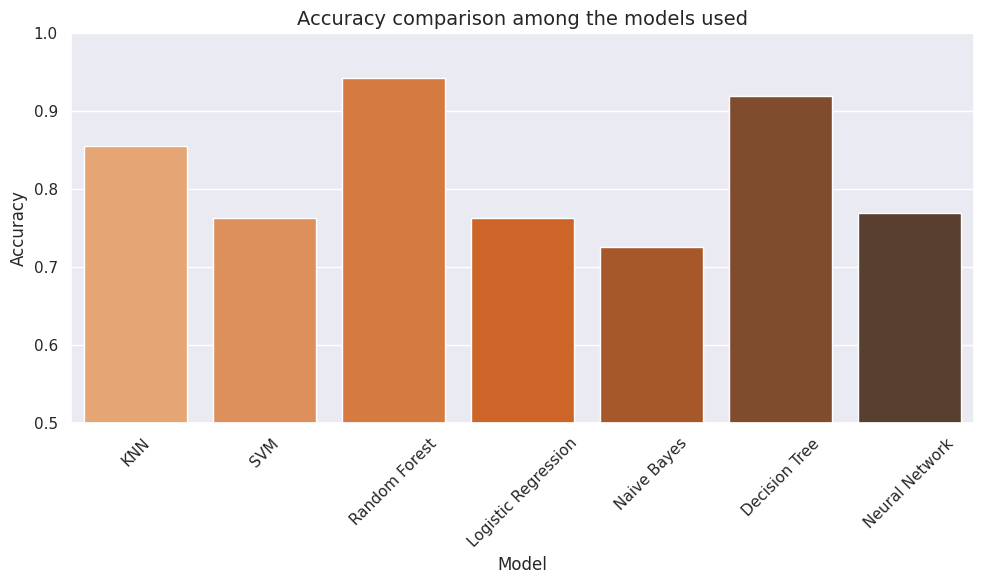

In [ ]:
import pandas as pd
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": list(results.values())
})
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", hue="Model", data=results_df, palette="Oranges_d", legend=False)

plt.ylim(0.5, 1.0)
plt.title("Accuracy comparison among the models used", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Visualization of the confusion matrices
Detailed analysis of classification results.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def showMatrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Oranges')

    # Format numbers as integers without scientific notation
    for text in disp.ax_.texts:
        text.set_text(f"{int(float(text.get_text())):,}")

    plt.title(f"Confusion matrix - {model_name}")
    plt.show()


### Confusion matrix of K-Nearest Neighbors (KNN)

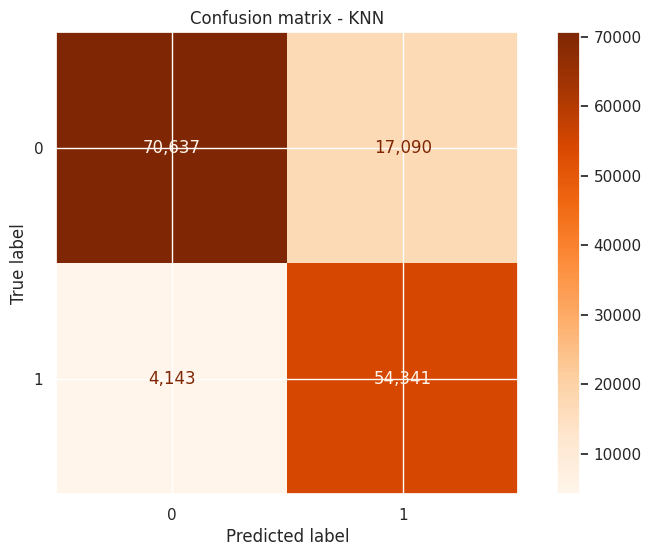

In [ ]:
showMatrix("KNN", y_test, y_pred_knn)

###Confusion matrix of Support Vector Machine (SVM)

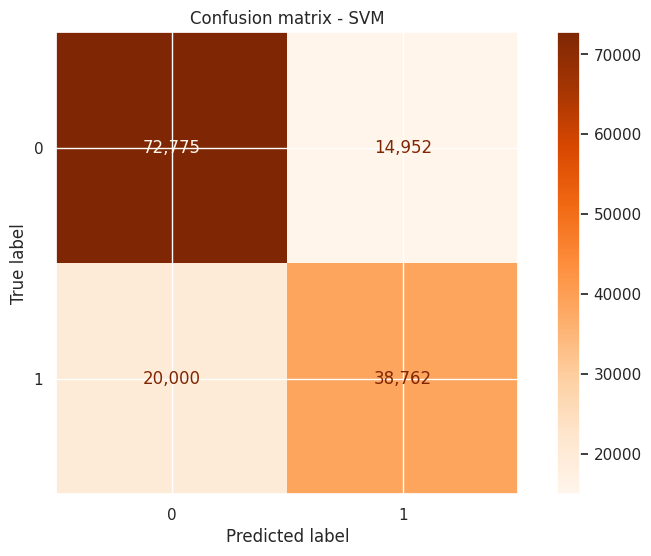

In [ ]:
showMatrix("SVM", y_test, y_pred_svm)

###Confusion matrix of Random Forest

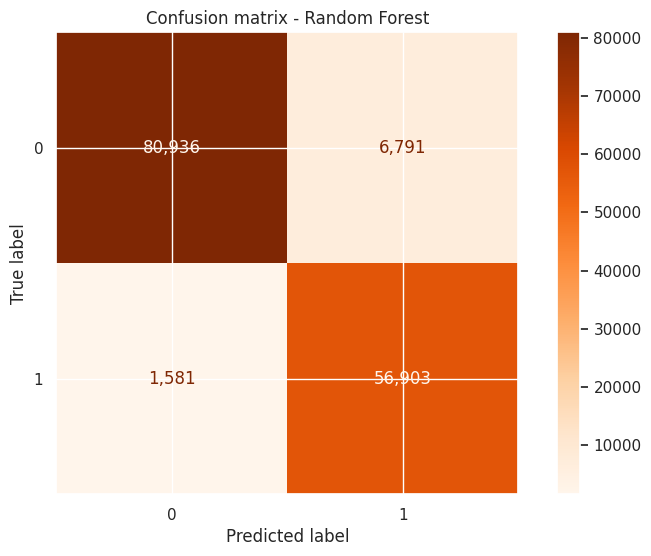

In [ ]:
showMatrix("Random Forest", y_test, y_pred_rf)

###Confusion matrix of Logistic Regression

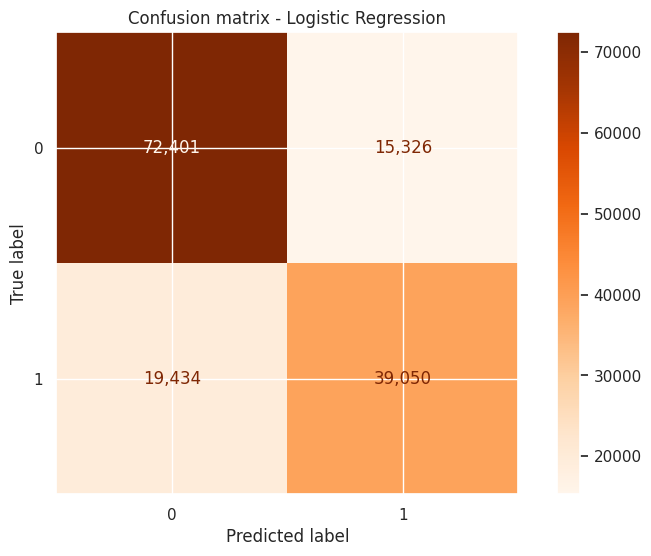

In [ ]:
showMatrix("Logistic Regression", y_test, y_pred_log)

# Conclusions

Among the models used, `Random Forest` achieved the best performance, showing an excellent balance between false positives (6,791) and false negatives (1,581), with the majority of instances correctly classified (80,936 and 56,903).

`Logistic Regression` and `SVM` provided fair but less accurate results, showing a higher number of misclassifications, especially false negatives (19,434 for Logistic Regression, 20,000 for SVM).

The `K-Nearest Neighbors` (KNN) model, while correctly classifying a large portion of positive observations (54,341), showed greater difficulty in recognizing the negative class, generating 17,090 false positives.

The confusion matrices clearly show that ensemble models such as Random Forest can ensure a better trade-off between sensitivity (True Positive Rate) and specificity (True Negative Rate), making them more suitable for medical applications where balancing the two classes is crucial.

Overall, using a test set equal to 30% of the data ensured a reliable performance evaluation, minimizing the risk of overfitting and increasing the robustness of the results.